In [3]:
# Core libraries
import pandas as pd
import numpy as np
import re

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import files
uploaded = files.upload()


Saving email_phishing_data.csv to email_phishing_data.csv


In [5]:
# Load dataset
df = pd.read_csv("email_phishing_data.csv")

# Preview dataset
df.head()


,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [6]:
# Check dataset structure
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


,0
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [7]:
# Separate the dataset into input features (X) and the target label (y)
X = df.drop('label', axis=1)
y = df['label']



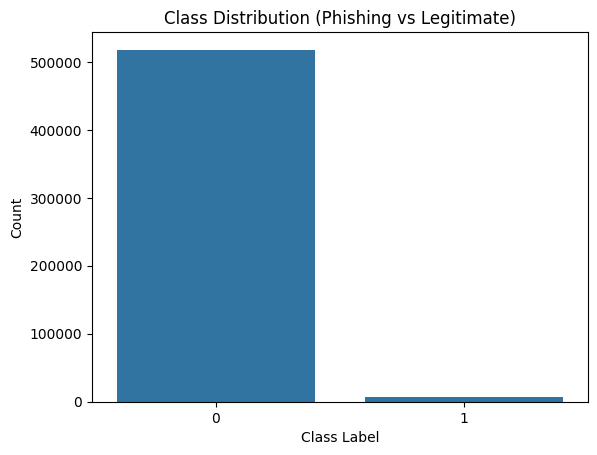

In [ ]:
# Class distribution (Exploratory Data Analysis)

import matplotlib.pyplot as plt
import seaborn as sns
# This code visualizes the distribution of phishing and legitimate emails to identify class imbalance in the dataset.
sns.countplot(x=y)
plt.title("Class Distribution (Phishing vs Legitimate)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [10]:
# Import function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Split the features (X) and labels (y) into 80% training and 20% testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler to normalize feature values

scaler = StandardScaler() # Create a scaler object to standardize features

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Train a Logistic Regression model on the scaled training data and evaluate its performance using accuracy and classification metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_preds = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


Logistic Regression Accuracy: 0.9867676478993999
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    103580
           1       1.00      0.00      0.00      1390

    accuracy                           0.99    104970
   macro avg       0.99      0.50      0.50    104970
weighted avg       0.99      0.99      0.98    104970



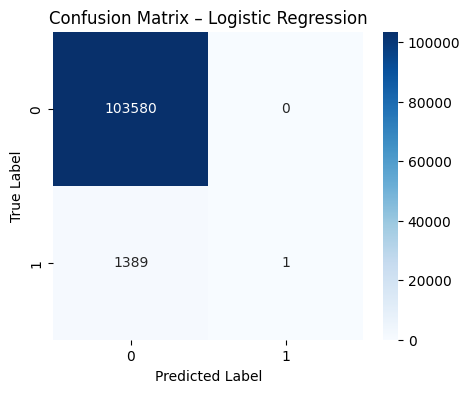

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_preds)
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier on the training data and evaluate its performance on the test set using accuracy and a classification report.

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9894160236257978
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    103580
           1       0.81      0.26      0.39      1390

    accuracy                           0.99    104970
   macro avg       0.90      0.63      0.69    104970
weighted avg       0.99      0.99      0.99    104970



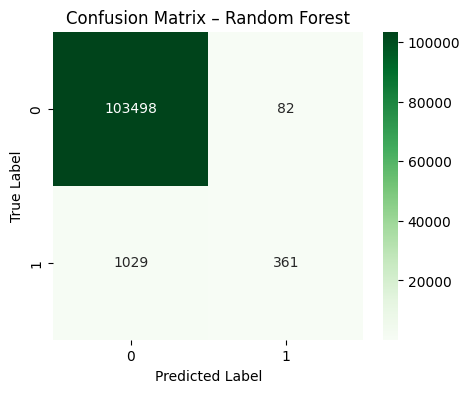

In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_preds)
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()


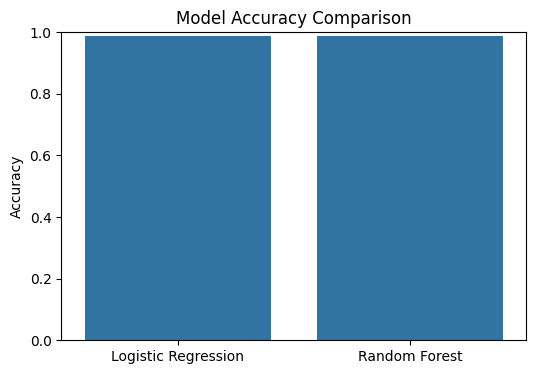

In [ ]:
# Model accuracy comparison
model_names = ['Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, lr_preds),
    accuracy_score(y_test, rf_preds)
]

plt.figure(figsize=(6,4))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
rf_probs = rf.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, rf_probs)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8660024434594051


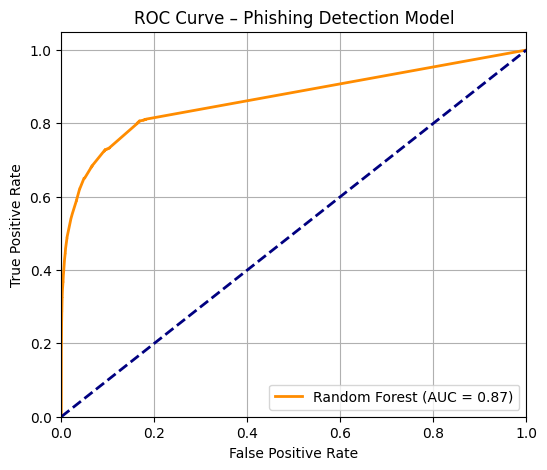

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Phishing Detection Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
